In [6]:
from gettext import install


%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd 

In [8]:
nyc_clean_df = pd.read_csv('Cleaned_NYC.csv')

In [16]:
# Features and target
X = nyc_clean_df[['neighbourhood_group', 'room_type']]
Y = nyc_clean_df['price']

In [17]:
# Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [18]:
# Preprocessing: OneHotEncoding for categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['neighbourhood_group', 'room_type'])
    ])

# Full pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [19]:
# Fit model
model_pipeline.fit(X_train, Y_train)

# Predict
y_pred = model_pipeline.predict(X_test)

# Evaluate
mae = mean_absolute_error(Y_test, y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, y_pred))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE: 112.74
RMSE: 639.06


In [23]:
%pip install matplotlib
%pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


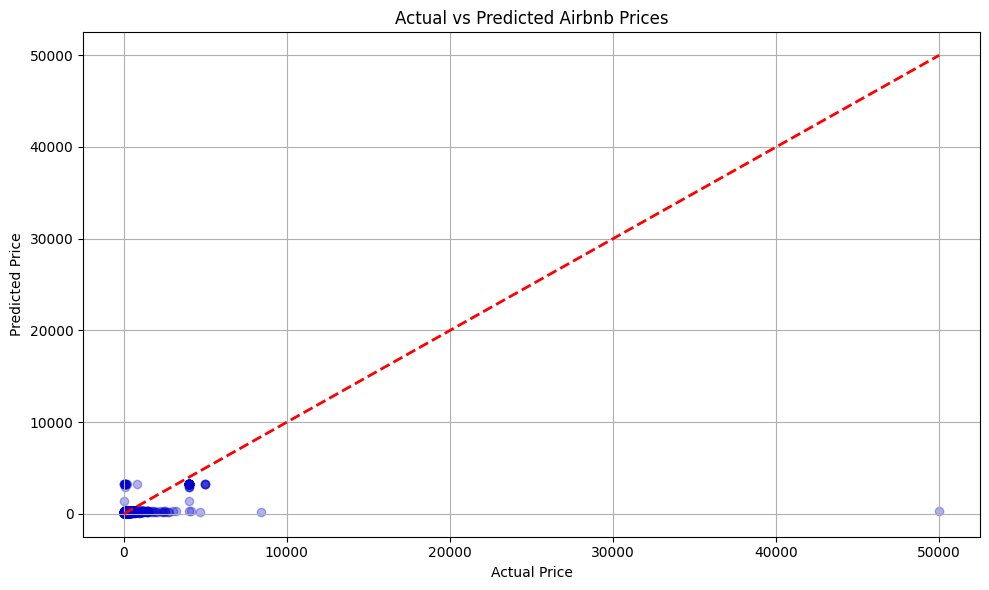

In [24]:
# plotting skills
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, y_pred, alpha=0.3, color='mediumblue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Airbnb Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


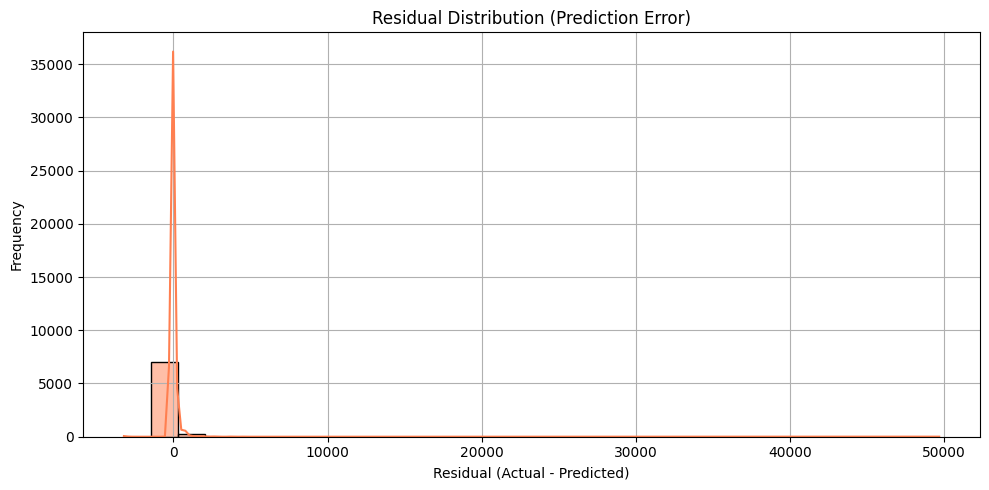

In [25]:
residuals = Y_test - y_pred
plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=30, color='coral')
plt.title("Residual Distribution (Prediction Error)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

In [28]:
r2 = r2_score(Y_test, y_pred)
print(f"R² Score: {r2:.3f}")

R² Score: 0.206


In [29]:
%pip install gradio


     ---------------------------------------- 0.0/57.7 kB ? eta -:--:--
     ---------------------------------------- 57.7/57.7 kB 3.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/54.3 MB ? eta -:--:--
   ---------------------------------------- 0.4/54.3 MB 10.9 MB/s eta 0:00:05
    --------------------------------------- 0.8/54.3 MB 13.2 MB/s eta 0:00:05
    --------------------------------------- 0.9/54.3 MB 8.0 MB/s eta 0:00:07
    --------------------------------------- 1.1/54.3 MB 6.4 MB/s eta 0:00:09
    --------------------------------------- 1.2/54.3 MB 6.1 MB/s eta 0:00:09
    --------------------------------------- 1.2/54.3 MB 6.1 MB/s eta 0:00:09
   - -------------------------------------- 1.6/54.3 MB 5.2 MB/s eta 0:00:11
   - -------------------------------------- 1.7/54.3 MB 4.7 MB/s eta 0:00:12
   - -------------------------------------- 1.9/54.3 MB 4.8 MB/s eta 0:00:11
   - -------------------------------------- 2.0/54.3 MB 4.4 MB/s eta 0:00:12
   - -


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# simple UI
import gradio as gr
import pandas as pd
import joblib

# Get unique values from your data for dropdowns
areas = sorted(nyc_clean_df['neighbourhood_group'].dropna().unique())
room_types = sorted(nyc_clean_df['room_type'].dropna().unique())

# Prediction function
def predict_price(area, room_type):
    input_df = pd.DataFrame([{
        "neighbourhood_group": area,
        "room_type": room_type
    }])
    
    try:
        prediction = model_pipeline.predict(input_df)[0]
        return f"${prediction:.2f}"
    except Exception as e:
        return f"Prediction failed: {e}"

# Gradio interface
with gr.Blocks() as demo:
    gr.Markdown("## NYC Airbnb Price Predictor")

    with gr.Row():
        area_input = gr.Dropdown(choices=areas, label="Select Neighborhood Area")
        room_type_input = gr.Dropdown(choices=room_types, label="Select Room Type")

    predict_btn = gr.Button("Predict Price")
    output = gr.Textbox(label="Predicted Price")

    predict_btn.click(fn=predict_price, inputs=[area_input, room_type_input], outputs=output)

# Launch the interface
demo.launch()


c:\Users\saikh\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
